In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report)
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Datos/Transformados/df_limpio.csv", index_col='ID')

In [61]:
df.head()

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,...,Fiador,Impago,Prima,Tipo_Jornada_Laboral_Autónomo,Tipo_Jornada_Laboral_Desempleado,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero
ID,,,,,,,,,,,,,,,,,,,,,
S97R7X,18,16000,5000,397,19,1,8.06,48,0.10,0,...,0,0,50.12,1,0,0,0,0,0,1
RLGTBY,50,62116,37278,486,217,3,21.96,12,0.55,1,...,1,1,800.00,0,0,0,1,1,0,0
SKE2P9,37,37602,44532,765,150,3,11.20,60,0.23,1,...,1,0,356.30,0,0,0,1,1,0,0
E2FB1D,56,67410,23752,643,369,1,21.24,24,0.18,1,...,0,0,198.72,1,0,0,0,1,0,0
TKSCGH,35,35930,28440,645,136,3,16.95,12,0.55,1,...,1,0,484.20,0,0,1,0,0,0,1


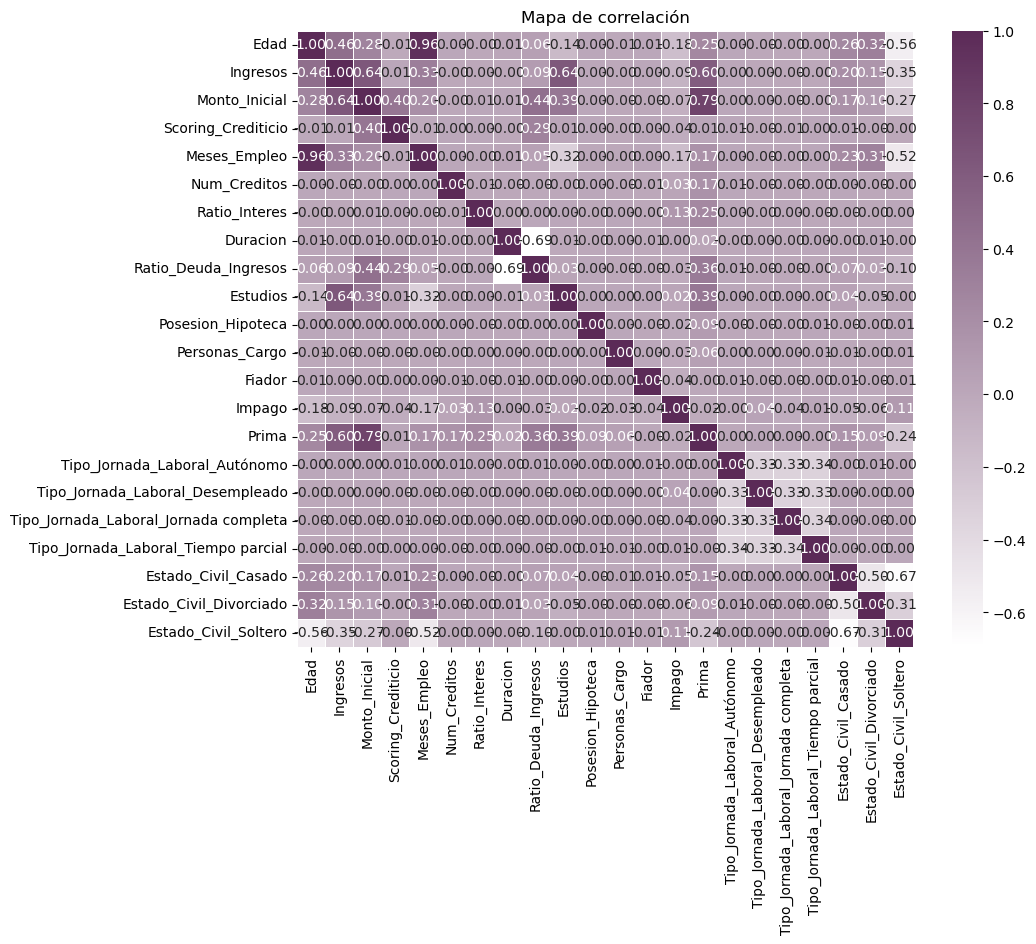

In [62]:
corr = df.corr(numeric_only=True)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=lagun_cmap,
    square=True,
    linewidths=0.5)
plt.title("Mapa de correlación")
plt.show()

In [63]:
df.columns

Index(['Edad', 'Ingresos', 'Monto_Inicial', 'Scoring_Crediticio',
       'Meses_Empleo', 'Num_Creditos', 'Ratio_Interes', 'Duracion',
       'Ratio_Deuda_Ingresos', 'Estudios', 'Posesion_Hipoteca',
       'Personas_Cargo', 'Fiador', 'Impago', 'Prima',
       'Tipo_Jornada_Laboral_Autónomo', 'Tipo_Jornada_Laboral_Desempleado',
       'Tipo_Jornada_Laboral_Jornada completa',
       'Tipo_Jornada_Laboral_Tiempo parcial', 'Estado_Civil_Casado',
       'Estado_Civil_Divorciado', 'Estado_Civil_Soltero'],
      dtype='object')

In [64]:
x = df.drop(columns=['Impago','Prima'])
y = df['Impago']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.30,
    random_state=8,
    shuffle=True,
    stratify=y)

In [65]:
# # PCA
# num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# scaler = MinMaxScaler()
# x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
# x_test[num_cols] = scaler.transform(x_test[num_cols])

# pca = PCA()
# X_train_pca = pca.fit_transform(x_train)

# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# for i, v in enumerate(explained_variance):
#     print(f"Componentes {i+1}: {v:.4f}")

# pca = PCA(n_components=0.90)
# X_train_pca = pca.fit_transform(x_train)
# X_test_pca = pca.transform(x_test)

# print("Número de componentes finales:", pca.n_components_)

# x_train = pd.DataFrame(
#     X_train_pca,
#     columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],
#     index=x_train.index)

# x_test = pd.DataFrame(
#     X_test_pca,
#     columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])],
#     index=x_test.index)

# Modelos sin SMOTE

## LDA

Mejores parámetros: {'selector__k': 90, 'lda__solver': 'eigen', 'lda__shrinkage': 'auto'}
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13442
           1       0.00      0.00      0.00      1812

    accuracy                           0.88     15254
   macro avg       0.44      0.50      0.47     15254
weighted avg       0.78      0.88      0.83     15254



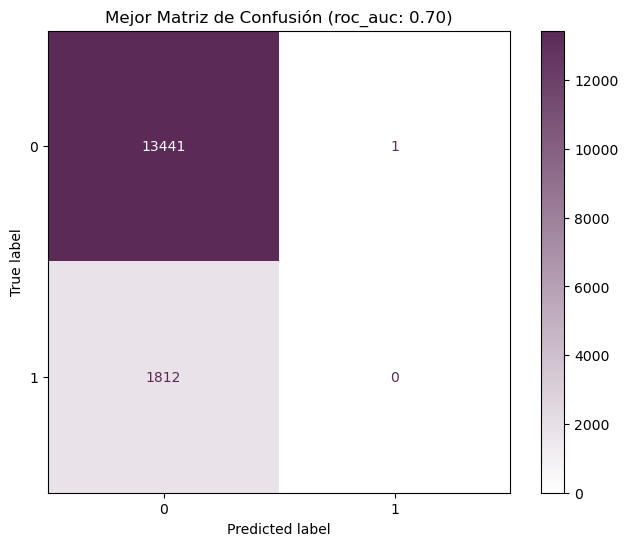

In [66]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9] }

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_LDA = {
    "modelo": "LDA",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Regresion Logistica

Mejores parámetros: {'selector__k': 80, 'logistic__penalty': 'l1', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     13442
           1       0.20      0.66      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.65      0.53     15254
weighted avg       0.85      0.64      0.70     15254



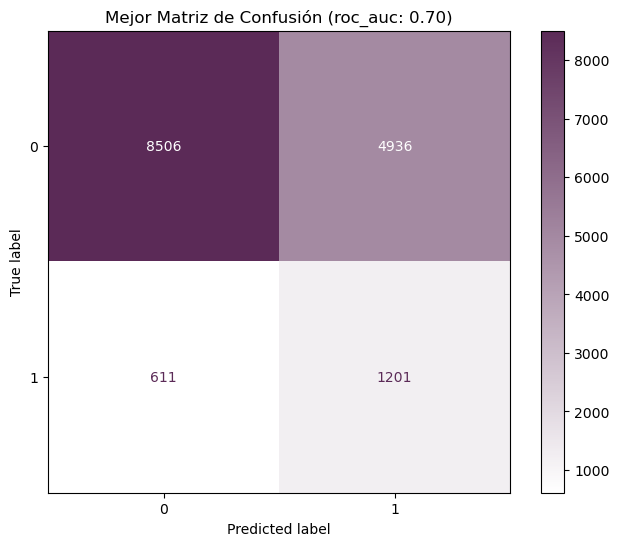

In [67]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog = {
    "modelo": "Regresion Logistica",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Naive Bayes

Mejores parámetros: {'selector__k': 60, 'nb__var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.91      0.87      0.88     13442
           1       0.25      0.33      0.28      1812

    accuracy                           0.80     15254
   macro avg       0.58      0.60      0.58     15254
weighted avg       0.83      0.80      0.81     15254



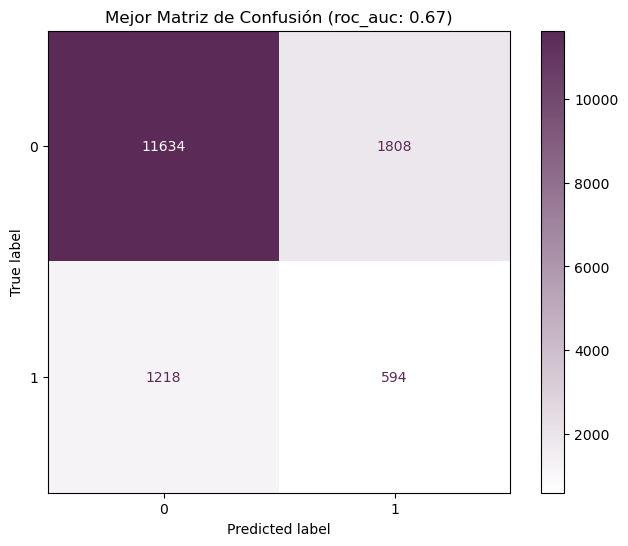

In [68]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_NaiBay = {
    "modelo": "Naive Bayes",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## SVM

Mejores parámetros: {'svm__C': 0.1, 'selector__k': 40}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.66      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.65      0.53     15254
weighted avg       0.85      0.64      0.70     15254



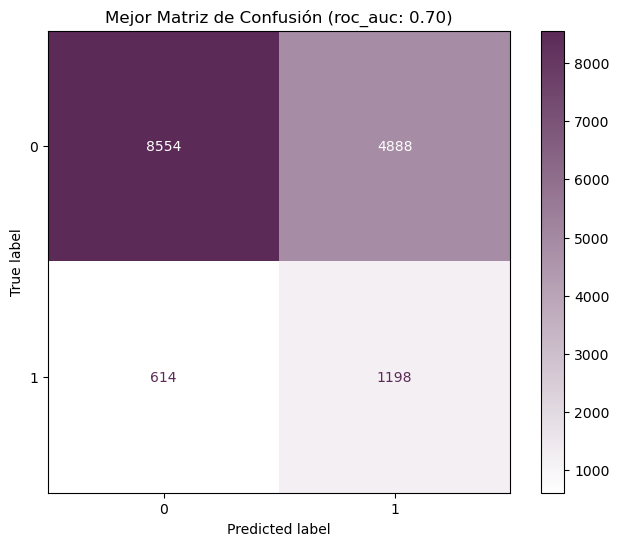

In [69]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_SVM = {
    "modelo": "SVM",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision (gini)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.19      0.61      0.29      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.64      0.70     15254



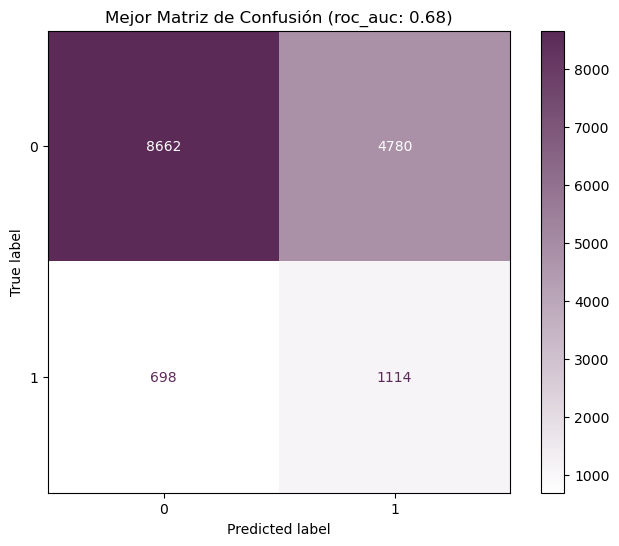

In [70]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['gini'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_gini = {
    "modelo": "Arbol de decision (gini)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision (entropy)

Mejores parámetros: {'selector__k': 90, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.19      0.61      0.29      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.64      0.70     15254



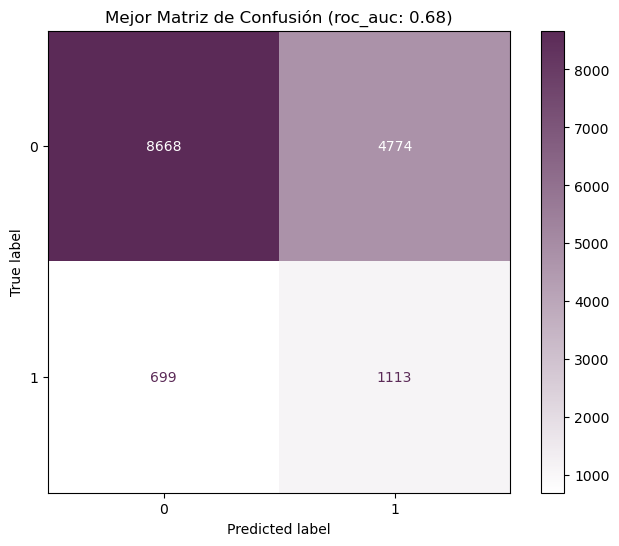

In [71]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['entropy'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_entropy = {
    "modelo": "Arbol de decision (entropy)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision (log_poss)

Mejores parámetros: {'selector__k': 90, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'log_loss'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.19      0.61      0.29      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.64      0.70     15254



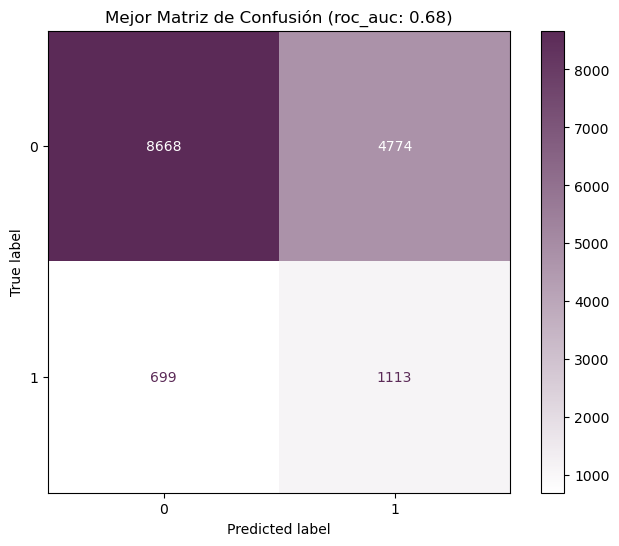

In [72]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['log_loss'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_log_poss = {
    "modelo": "Arbol de decision (log_poss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

# Modelos con SMOTE

## Regresion Logistica

Mejores parámetros: {'selector__k': 40, 'logistic__penalty': 'l1', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     13442
           1       0.20      0.65      0.30      1812

    accuracy                           0.65     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.65      0.71     15254



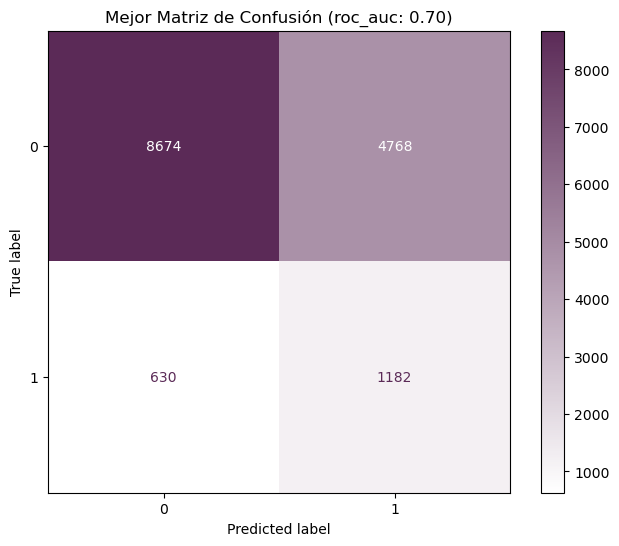

In [73]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('smote', SMOTE(random_state=6)),
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog_SMOTE = {
    "modelo": "Regresion Logistica (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## LDA

Mejores parámetros: {'selector__k': 90, 'lda__solver': 'eigen', 'lda__shrinkage': 'auto'}
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     13442
           1       0.20      0.65      0.31      1812

    accuracy                           0.65     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.65      0.71     15254



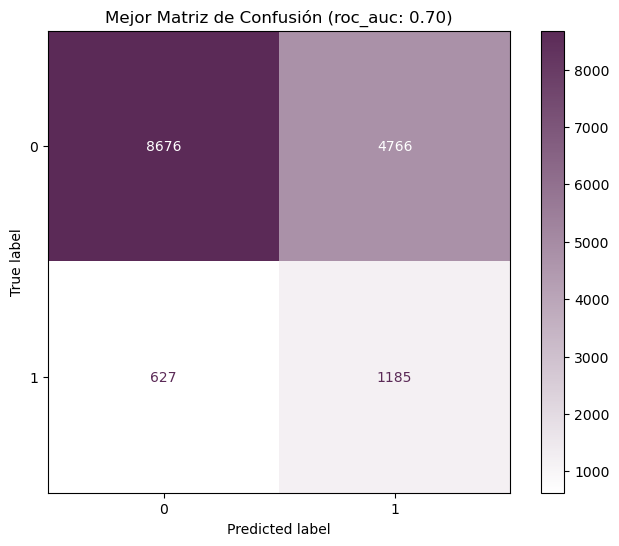

In [74]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9] }

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_LDA_SMOTE = {
    "modelo": "LDA (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Naive Bayes

Mejores parámetros: {'selector__k': 60, 'nb__var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     13442
           1       0.19      0.62      0.29      1812

    accuracy                           0.63     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.63      0.70     15254



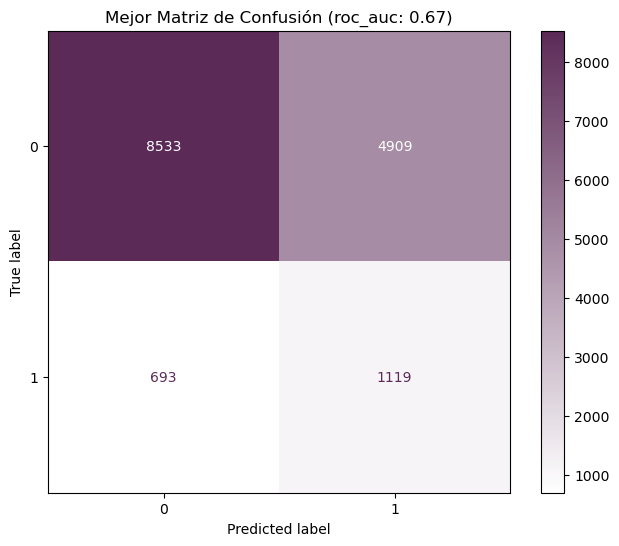

In [75]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_NaiBay_SMOTE = {
    "modelo": "Naive Bayes (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## SVM

Mejores parámetros: {'svm__C': 0.1, 'selector__k': 40}
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     13442
           1       0.20      0.65      0.30      1812

    accuracy                           0.65     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.65      0.71     15254



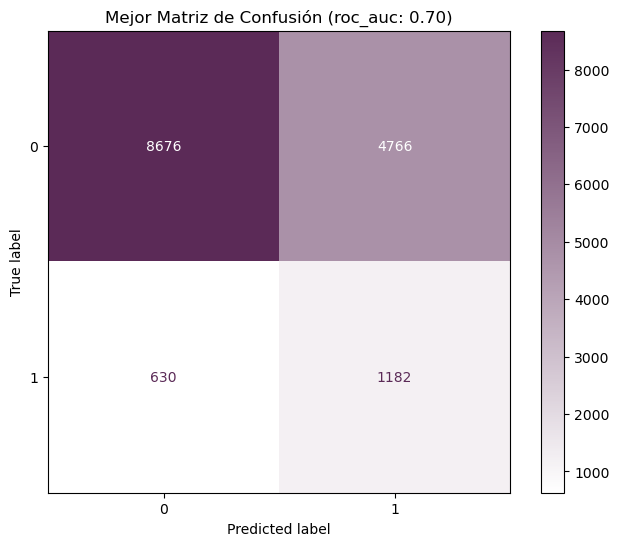

In [76]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_SVM_SMOTE = {
    "modelo": "SVM (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision (gini)

Mejores parámetros: {'selector__k': 90, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     13442
           1       0.17      0.55      0.26      1812

    accuracy                           0.63     15254
   macro avg       0.54      0.60      0.51     15254
weighted avg       0.83      0.63      0.70     15254



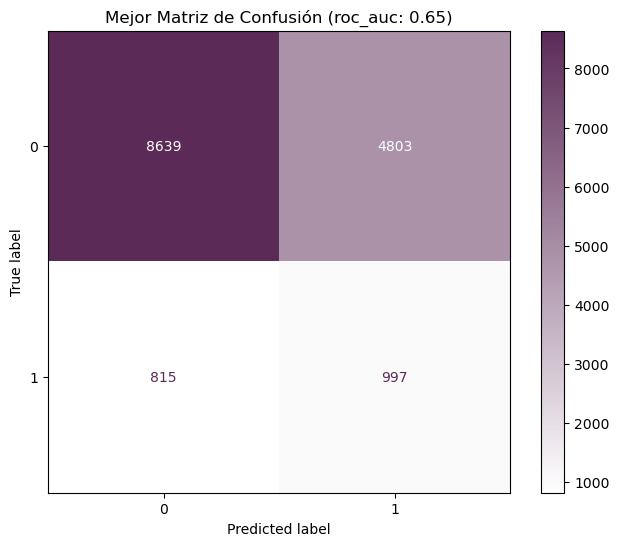

In [77]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['gini'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_SMOTE_gini = {
    "modelo": "Arbol de decision (SMOTE) (gini)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision (entropy)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     13442
           1       0.17      0.55      0.26      1812

    accuracy                           0.63     15254
   macro avg       0.54      0.60      0.51     15254
weighted avg       0.83      0.63      0.70     15254



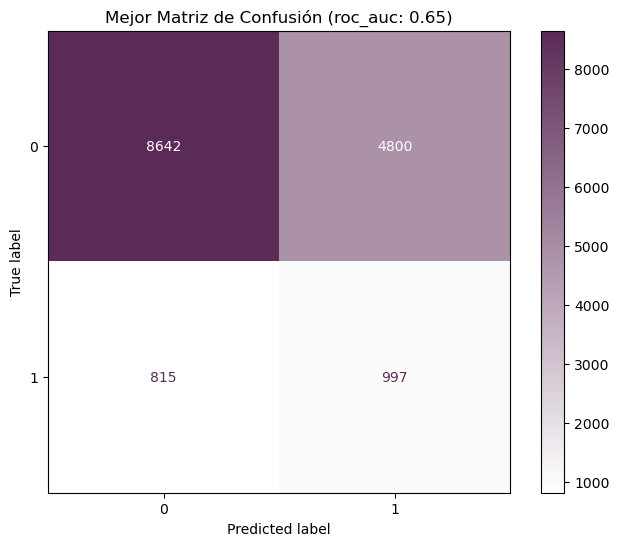

In [78]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['entropy'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_SMOTE_entropy = {
    "modelo": "Arbol de decision (SMOTE) (entropy)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision (log_poss)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'log_loss'}
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     13442
           1       0.17      0.55      0.26      1812

    accuracy                           0.63     15254
   macro avg       0.54      0.60      0.51     15254
weighted avg       0.83      0.63      0.70     15254



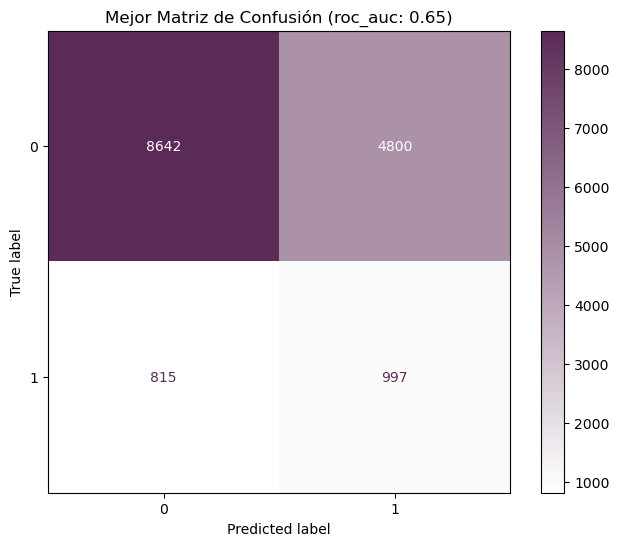

In [79]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['log_loss'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_SMOTE_log_poss = {
    "modelo": "Arbol de decision (SMOTE) (log_poss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

# Resultados

In [80]:
df = pd.DataFrame(columns=[
    "modelo",
    "roc-auc",
    "recall 1",
    "f1-score medio"])

df = pd.concat([df, pd.DataFrame([fila_LDA])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_RegLog])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol_gini])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol_entropy])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol_log_poss])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_NaiBay])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_SVM])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_LDA_SMOTE])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_RegLog_SMOTE])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol_SMOTE_entropy])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol_SMOTE_gini])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol_SMOTE_log_poss])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_NaiBay_SMOTE])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_SVM_SMOTE])], ignore_index=True)

In [81]:
df_ordenado = df.sort_values(by="roc-auc", ascending=False).round(3).reset_index(drop=True)

print(df_ordenado.to_string(index=False))

                              modelo  roc-auc  recall 1  f1-score medio
                 Regresion Logistica    0.704     0.663           0.528
                                 SVM    0.704     0.661           0.530
         Regresion Logistica (SMOTE)    0.704     0.652           0.534
                                 LDA    0.704     0.000           0.468
                         LDA (SMOTE)    0.703     0.654           0.534
                         SVM (SMOTE)    0.703     0.652           0.534
         Arbol de decision (entropy)    0.677     0.614           0.525
        Arbol de decision (log_poss)    0.677     0.614           0.525
            Arbol de decision (gini)    0.676     0.615           0.524
                         Naive Bayes    0.674     0.328           0.583
                 Naive Bayes (SMOTE)    0.673     0.618           0.519
 Arbol de decision (SMOTE) (entropy)    0.649     0.550           0.508
Arbol de decision (SMOTE) (log_poss)    0.649     0.550         